# Boltzmann Machine (1985)

---

## Description
The **Boltzmann Machine**, introduced by Geoffrey Hinton and Terrence Sejnowski in 1985, is a **stochastic recurrent neural network** designed for **unsupervised learning** and **generative modeling**.  

Key characteristics:
- Composed of **visible nodes** (observed data) and **hidden nodes** (latent variables).  
- Neurons are **binary stochastic units** (\( s_i \in \{0,1\} \)) that update probabilistically.  
- The probability of a unit being active is governed by a **logistic sigmoid** of its input.  

The **energy function** defines the probability of a state configuration:

$$
E(\mathbf{s}) = - \sum_{i<j} w_{ij} s_i s_j - \sum_i b_i s_i
$$

The probability of a state is given by the **Boltzmann distribution**:

$$
P(\mathbf{s}) = \frac{1}{Z} \exp(-E(\mathbf{s}))
$$

where \( Z \) is the partition function (normalization).

---

## Relevance
- One of the **first deep generative models**.  
- Showed how neural networks can **learn probability distributions** over data, not just deterministic mappings.  
- Inspired later breakthroughs:
  - **Restricted Boltzmann Machines (RBMs)** (Hinton, 1986) → simplified training.  
  - **Deep Belief Networks (DBNs)** (Hinton et al., 2006) → stacking RBMs for hierarchical learning.  
- Bridged the gap between **statistical physics** and **machine learning**.  

---

## Connection
- Uses **Markov Chain Monte Carlo (MCMC)** sampling to explore the state space.  
  - States evolve stochastically, like in **Markov processes**.  
  - The system eventually samples from the target distribution \( P(\mathbf{s}) \).  
- Explicit link between **energy-based models** (physics) and **probabilistic neural networks**.  

---

## Summary
- **Boltzmann Machine (1985)** = Stochastic recurrent network with visible + hidden nodes.  
- Learns **probabilistic generative models** of data.  
- Uses **energy minimization** and **MCMC sampling** for learning and inference.  
- Laid the foundation for **RBMs, DBNs, and modern energy-based deep learning models**.


In [1]:
# ===========================================================
# PyTorch Lab: Restricted Boltzmann Machine (RBM)
# -----------------------------------------------------------
# Description: Stochastic generative model with visible and hidden units
# Relevance: Practical variant of Boltzmann Machine, trainable via Contrastive Divergence
# Connection: Uses MCMC (Gibbs sampling) to approximate data distribution
# ===========================================================

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# -----------------------------
# RBM Class
# -----------------------------
class RBM(nn.Module):
    def __init__(self, n_visible, n_hidden):
        super().__init__()
        self.W = nn.Parameter(torch.randn(n_hidden, n_visible) * 0.1)  # weights
        self.h_bias = nn.Parameter(torch.zeros(n_hidden))  # hidden bias
        self.v_bias = nn.Parameter(torch.zeros(n_visible))  # visible bias

    def sample_h(self, v):
        """Sample hidden units given visible units"""
        prob = torch.sigmoid(torch.matmul(v, self.W.t()) + self.h_bias)
        return prob, torch.bernoulli(prob)

    def sample_v(self, h):
        """Sample visible units given hidden units"""
        prob = torch.sigmoid(torch.matmul(h, self.W) + self.v_bias)
        return prob, torch.bernoulli(prob)

    def forward(self, v):
        """One Gibbs step: v -> h -> v"""
        _, h = self.sample_h(v)
        _, v_recon = self.sample_v(h)
        return v_recon

    def contrastive_divergence(self, v0, k=1):
        """CD-k training step"""
        v = v0
        for _ in range(k):
            prob_h, h = self.sample_h(v)
            prob_v, v = self.sample_v(h)

        # positive phase
        prob_h0, _ = self.sample_h(v0)

        # weight updates
        dW = torch.matmul(prob_h0.t(), v0) - torch.matmul(prob_h.t(), v)
        dvb = torch.sum(v0 - v, dim=0)
        dhb = torch.sum(prob_h0 - prob_h, dim=0)

        return dW, dvb, dhb

In [2]:
# -----------------------------
# Training Function
# -----------------------------
def train_rbm(rbm, data, lr=0.01, epochs=5, k=1):
    losses = []
    for epoch in range(epochs):
        epoch_loss = 0
        for v0 in data:
            v0 = v0.view(1, -1)
            dW, dvb, dhb = rbm.contrastive_divergence(v0, k=k)
            rbm.W.data += lr * dW
            rbm.v_bias.data += lr * dvb
            rbm.h_bias.data += lr * dhb

            v_recon = rbm.forward(v0)
            loss = torch.mean((v0 - v_recon) ** 2).item()
            epoch_loss += loss
        losses.append(epoch_loss / len(data))
        print(f"Epoch {epoch+1}, Loss: {losses[-1]:.4f}")
    return losses

In [3]:
# -----------------------------
# Example Data (Simple Binary Patterns)
# -----------------------------
# Using toy data: 4 patterns (like binary images)
patterns = torch.tensor([
    [1,0,1,0,1,0,1,0],
    [0,1,0,1,0,1,0,1],
    [1,1,0,0,1,1,0,0],
    [0,0,1,1,0,0,1,1]
], dtype=torch.float32)

In [4]:
# -----------------------------
# Train RBM
# -----------------------------
rbm = RBM(n_visible=8, n_hidden=4)
losses = train_rbm(rbm, patterns, lr=0.05, epochs=100, k=1)


Epoch 1, Loss: 0.4375
Epoch 2, Loss: 0.4062
Epoch 3, Loss: 0.6250
Epoch 4, Loss: 0.4688
Epoch 5, Loss: 0.6875
Epoch 6, Loss: 0.5000
Epoch 7, Loss: 0.6250
Epoch 8, Loss: 0.6250
Epoch 9, Loss: 0.6875
Epoch 10, Loss: 0.2812
Epoch 11, Loss: 0.5625
Epoch 12, Loss: 0.4062
Epoch 13, Loss: 0.3750
Epoch 14, Loss: 0.4375
Epoch 15, Loss: 0.4062
Epoch 16, Loss: 0.4062
Epoch 17, Loss: 0.5625
Epoch 18, Loss: 0.4688
Epoch 19, Loss: 0.5938
Epoch 20, Loss: 0.5000
Epoch 21, Loss: 0.6250
Epoch 22, Loss: 0.5625
Epoch 23, Loss: 0.3438
Epoch 24, Loss: 0.3750
Epoch 25, Loss: 0.3438
Epoch 26, Loss: 0.5000
Epoch 27, Loss: 0.3750
Epoch 28, Loss: 0.5000
Epoch 29, Loss: 0.5000
Epoch 30, Loss: 0.5000
Epoch 31, Loss: 0.6250
Epoch 32, Loss: 0.6562
Epoch 33, Loss: 0.5938
Epoch 34, Loss: 0.5000
Epoch 35, Loss: 0.4688
Epoch 36, Loss: 0.3750
Epoch 37, Loss: 0.5000
Epoch 38, Loss: 0.5625
Epoch 39, Loss: 0.4688
Epoch 40, Loss: 0.4062
Epoch 41, Loss: 0.5000
Epoch 42, Loss: 0.4688
Epoch 43, Loss: 0.3438
Epoch 44, Loss: 0.53

In [5]:
# -----------------------------
# Test Reconstructions
# -----------------------------
print("\nReconstruction Test:")
for p in patterns:
    p = p.view(1,-1)
    recon = rbm.forward(p)
    print(f"Input: {p.numpy()} -> Reconstructed: {recon.detach().round().numpy()}")




Reconstruction Test:
Input: [[1. 0. 1. 0. 1. 0. 1. 0.]] -> Reconstructed: [[1. 0. 1. 1. 1. 0. 1. 0.]]
Input: [[0. 1. 0. 1. 0. 1. 0. 1.]] -> Reconstructed: [[0. 1. 0. 0. 0. 0. 0. 1.]]
Input: [[1. 1. 0. 0. 1. 1. 0. 0.]] -> Reconstructed: [[0. 1. 0. 0. 1. 1. 0. 0.]]
Input: [[0. 0. 1. 1. 0. 0. 1. 1.]] -> Reconstructed: [[0. 0. 1. 1. 0. 0. 1. 1.]]


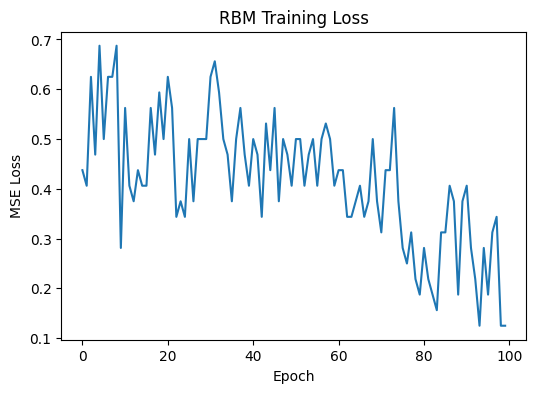

In [6]:
# -----------------------------
# Visualize Loss
# -----------------------------
plt.figure(figsize=(6,4))
plt.plot(losses)
plt.title("RBM Training Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()

In [7]:
# ===========================================================
# PyTorch Lab: RBM on MNIST
# -----------------------------------------------------------
# Description: Restricted Boltzmann Machine trained on MNIST
# Relevance: Historical stepping stone to Deep Belief Networks
# Connection: Energy-based model, trained with Contrastive Divergence
# ===========================================================

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# -----------------------------
# RBM Class
# -----------------------------
class RBM(nn.Module):
    def __init__(self, n_visible, n_hidden):
        super().__init__()
        self.W = nn.Parameter(torch.randn(n_hidden, n_visible) * 0.1)
        self.h_bias = nn.Parameter(torch.zeros(n_hidden))
        self.v_bias = nn.Parameter(torch.zeros(n_visible))

    def sample_h(self, v):
        prob = torch.sigmoid(torch.matmul(v, self.W.t()) + self.h_bias)
        return prob, torch.bernoulli(prob)

    def sample_v(self, h):
        prob = torch.sigmoid(torch.matmul(h, self.W) + self.v_bias)
        return prob, torch.bernoulli(prob)

    def forward(self, v):
        _, h = self.sample_h(v)
        _, v_recon = self.sample_v(h)
        return v_recon

    def contrastive_divergence(self, v0, k=1):
        v = v0
        for _ in range(k):
            prob_h, h = self.sample_h(v)
            prob_v, v = self.sample_v(h)

        prob_h0, _ = self.sample_h(v0)
        dW = torch.matmul(prob_h0.t(), v0) - torch.matmul(prob_h.t(), v)
        dvb = torch.sum(v0 - v, dim=0)
        dhb = torch.sum(prob_h0 - prob_h, dim=0)
        return dW, dvb, dhb

# -----------------------------
# Load MNIST (Binarized)
# -----------------------------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: (x > 0.5).float().view(-1))  # binarize
])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                      download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 59.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.69MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.8MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.92MB/s]


In [8]:
# -----------------------------
# Train RBM
# -----------------------------
n_visible = 784  # 28x28
n_hidden = 128   # hidden features
rbm = RBM(n_visible, n_hidden)

epochs = 5
lr = 0.01

losses = []
for epoch in range(epochs):
    epoch_loss = 0
    for batch, _ in trainloader:
        v0 = batch
        dW, dvb, dhb = rbm.contrastive_divergence(v0, k=1)

        rbm.W.data += lr * dW / v0.size(0)
        rbm.v_bias.data += lr * dvb / v0.size(0)
        rbm.h_bias.data += lr * dhb / v0.size(0)

        v_recon = rbm.forward(v0)
        loss = torch.mean((v0 - v_recon) ** 2).item()
        epoch_loss += loss
    losses.append(epoch_loss / len(trainloader))
    print(f"Epoch {epoch+1}, Loss: {losses[-1]:.4f}")

Epoch 1, Loss: 0.2394
Epoch 2, Loss: 0.1650
Epoch 3, Loss: 0.1416
Epoch 4, Loss: 0.1310
Epoch 5, Loss: 0.1245


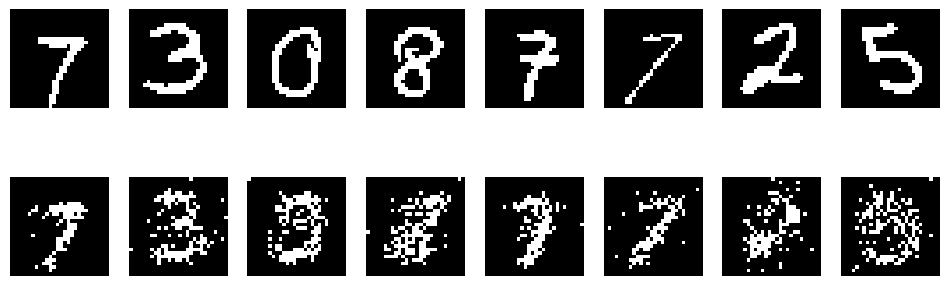

In [9]:
# -----------------------------
# Visualize Reconstructions
# -----------------------------
dataiter = iter(trainloader)
images, _ = next(dataiter)
v0 = images[:8]
v_recon = rbm.forward(v0).detach()

fig, axes = plt.subplots(2, 8, figsize=(12,4))
for i in range(8):
    axes[0,i].imshow(v0[i].view(28,28), cmap="gray")
    axes[0,i].axis("off")
    axes[1,i].imshow(v_recon[i].view(28,28), cmap="gray")
    axes[1,i].axis("off")
axes[0,0].set_ylabel("Original", fontsize=12)
axes[1,0].set_ylabel("Reconstruction", fontsize=12)
plt.show()


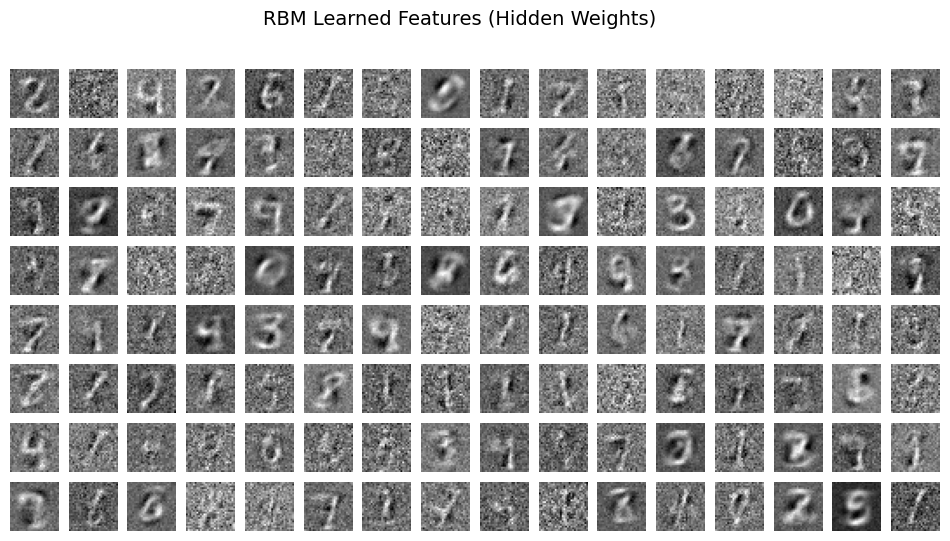

In [10]:
# -----------------------------
# Visualize Learned Weights
# -----------------------------
fig, axes = plt.subplots(8, 16, figsize=(12,6))
for i, ax in enumerate(axes.flat):
    if i < n_hidden:
        ax.imshow(rbm.W[i].detach().view(28,28), cmap="gray")
    ax.axis("off")
plt.suptitle("RBM Learned Features (Hidden Weights)", fontsize=14)
plt.show()

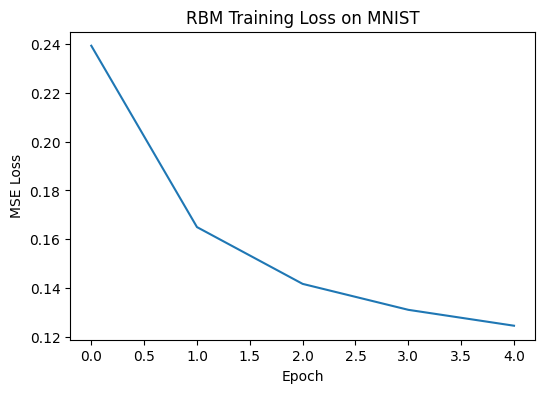

In [11]:
# -----------------------------
# Plot Training Loss
# -----------------------------
plt.figure(figsize=(6,4))
plt.plot(losses)
plt.title("RBM Training Loss on MNIST")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()


In [1]:
# ===========================================================
# Deep Belief Network (Stacked RBMs) on MNIST
# -----------------------------------------------------------
# Description: DBN = multiple RBMs stacked layer by layer
# Relevance: Hinton et al. (2006) showed DBNs revive deep learning
# Connection: Greedy layer-wise pretraining, then supervised fine-tuning
# ===========================================================

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
# -----------------------------
# RBM Class (same as before)
# -----------------------------
class RBM(nn.Module):
    def __init__(self, n_visible, n_hidden):
        super().__init__()
        self.W = nn.Parameter(torch.randn(n_hidden, n_visible) * 0.1)
        self.h_bias = nn.Parameter(torch.zeros(n_hidden))
        self.v_bias = nn.Parameter(torch.zeros(n_visible))

    def sample_h(self, v):
        prob = torch.sigmoid(torch.matmul(v, self.W.t()) + self.h_bias)
        return prob, torch.bernoulli(prob)

    def sample_v(self, h):
        prob = torch.sigmoid(torch.matmul(h, self.W) + self.v_bias)
        return prob, torch.bernoulli(prob)

    def forward(self, v):
        _, h = self.sample_h(v)
        _, v_recon = self.sample_v(h)
        return v_recon

    def contrastive_divergence(self, v0, k=1):
        v = v0
        for _ in range(k):
            prob_h, h = self.sample_h(v)
            prob_v, v = self.sample_v(h)

        prob_h0, _ = self.sample_h(v0)
        dW = torch.matmul(prob_h0.t(), v0) - torch.matmul(prob_h.t(), v)
        dvb = torch.sum(v0 - v, dim=0)
        dhb = torch.sum(prob_h0 - prob_h, dim=0)
        return dW, dvb, dhb

In [3]:
# -----------------------------
# Load MNIST (Binarized)
# -----------------------------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: (x > 0.5).float().view(-1))  # binarize
])
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                      download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


100%|██████████| 9.91M/9.91M [00:00<00:00, 18.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 509kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.56MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 12.3MB/s]


In [4]:
# -----------------------------
# Train RBM Function
# -----------------------------
def train_rbm(rbm, dataloader, lr=0.01, epochs=5, k=1):
    for epoch in range(epochs):
        epoch_loss = 0
        for batch in dataloader:
            # Handle both (data, label) and data-only
            if isinstance(batch, (list, tuple)):
                v0 = batch[0]
            else:
                v0 = batch

            dW, dvb, dhb = rbm.contrastive_divergence(v0, k=k)
            rbm.W.data += lr * dW / v0.size(0)
            rbm.v_bias.data += lr * dvb / v0.size(0)
            rbm.h_bias.data += lr * dhb / v0.size(0)

            v_recon = rbm.forward(v0)
            loss = torch.mean((v0 - v_recon) ** 2).item()
            epoch_loss += loss
        print(f"RBM Epoch {epoch+1}, Loss: {epoch_loss/len(dataloader):.4f}")


In [5]:
# -----------------------------
# Step 1: Train First RBM
# -----------------------------
rbm1 = RBM(784, 500)
train_rbm(rbm1, trainloader, lr=0.05, epochs=5)

RBM Epoch 1, Loss: 0.0865
RBM Epoch 2, Loss: 0.0770
RBM Epoch 3, Loss: 0.0785
RBM Epoch 4, Loss: 0.0799
RBM Epoch 5, Loss: 0.0804


In [6]:
# -----------------------------
# Step 2: Train Second RBM on Hidden Activations
# -----------------------------
hidden_data = []
with torch.no_grad():
    for batch, _ in trainloader:
        prob_h, h = rbm1.sample_h(batch)
        hidden_data.append(prob_h)
hidden_data = torch.cat(hidden_data, dim=0)
hidden_loader = torch.utils.data.DataLoader(hidden_data, batch_size=64, shuffle=True)

rbm2 = RBM(500, 250)
train_rbm(rbm2, hidden_loader, lr=0.05, epochs=5)

RBM Epoch 1, Loss: 0.0341
RBM Epoch 2, Loss: 0.0217
RBM Epoch 3, Loss: 0.0185
RBM Epoch 4, Loss: 0.0168
RBM Epoch 5, Loss: 0.0156


In [7]:
# -----------------------------
# Step 3: Build DBN Classifier (RBM features + logistic regression)
# -----------------------------
class DBNClassifier(nn.Module):
    def __init__(self, rbm1, rbm2, n_classes=10):
        super().__init__()
        self.rbm1 = rbm1
        self.rbm2 = rbm2
        self.fc = nn.Linear(250, n_classes)

    def forward(self, x):
        with torch.no_grad():
            prob_h1, _ = self.rbm1.sample_h(x)
            prob_h2, _ = self.rbm2.sample_h(prob_h1)
        return self.fc(prob_h2)

In [8]:
# -----------------------------
# Supervised Fine-Tuning
# -----------------------------
# Reload MNIST with labels (not binarized)
transform_supervised = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1))
])
trainset_supervised = torchvision.datasets.MNIST(root='./data', train=True,
                                                 download=True, transform=transform_supervised)
trainloader_supervised = torch.utils.data.DataLoader(trainset_supervised, batch_size=64, shuffle=True)

dbn = DBNClassifier(rbm1, rbm2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(dbn.fc.parameters(), lr=0.001)

epochs = 3
for epoch in range(epochs):
    epoch_loss = 0
    for batch, labels in trainloader_supervised:
        outputs = dbn(batch)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"DBN Fine-Tuning Epoch {epoch+1}, Loss: {epoch_loss/len(trainloader_supervised):.4f}")


DBN Fine-Tuning Epoch 1, Loss: 0.6522
DBN Fine-Tuning Epoch 2, Loss: 0.3830
DBN Fine-Tuning Epoch 3, Loss: 0.3448


RBM1 Epoch 1, Loss: 0.0863
RBM1 Epoch 2, Loss: 0.0767
RBM1 Epoch 3, Loss: 0.0782
RBM1 Epoch 4, Loss: 0.0799
RBM1 Epoch 5, Loss: 0.0812


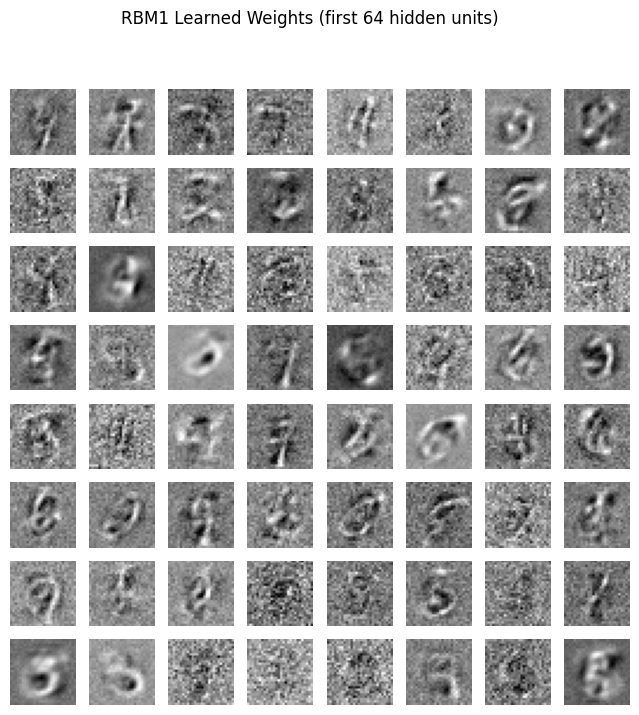

In [10]:
# ===========================================================
# Deep Belief Network (Stacked RBMs) on MNIST
# ===========================================================

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# -----------------------------
# RBM Class
# -----------------------------
class RBM(nn.Module):
    def __init__(self, n_visible, n_hidden):
        super().__init__()
        self.W = nn.Parameter(torch.randn(n_hidden, n_visible) * 0.1)
        self.h_bias = nn.Parameter(torch.zeros(n_hidden))
        self.v_bias = nn.Parameter(torch.zeros(n_visible))

    def sample_h(self, v):
        prob = torch.sigmoid(torch.matmul(v, self.W.t()) + self.h_bias)
        return prob, torch.bernoulli(prob)

    def sample_v(self, h):
        prob = torch.sigmoid(torch.matmul(h, self.W) + self.v_bias)
        return prob, torch.bernoulli(prob)

    def forward(self, v):
        _, h = self.sample_h(v)
        _, v_recon = self.sample_v(h)
        return v_recon

    def contrastive_divergence(self, v0, k=1):
        v = v0
        for _ in range(k):
            prob_h, h = self.sample_h(v)
            prob_v, v = self.sample_v(h)
        prob_h0, _ = self.sample_h(v0)
        dW = torch.matmul(prob_h0.t(), v0) - torch.matmul(prob_h.t(), v)
        dvb = torch.sum(v0 - v, dim=0)
        dhb = torch.sum(prob_h0 - prob_h, dim=0)
        return dW, dvb, dhb

# -----------------------------
# Load MNIST (Binarized)
# -----------------------------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: (x > 0.5).float().view(-1))  # binarize
])
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                      download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# -----------------------------
# Train RBM Function
# -----------------------------
def train_rbm(rbm, dataloader, lr=0.01, epochs=5, k=1, name="RBM"):
    losses = []
    for epoch in range(epochs):
        epoch_loss = 0
        for batch in dataloader:
            if isinstance(batch, (list, tuple)):  # (data, labels)
                v0 = batch[0]
            else:
                v0 = batch
            dW, dvb, dhb = rbm.contrastive_divergence(v0, k=k)
            rbm.W.data += lr * dW / v0.size(0)
            rbm.v_bias.data += lr * dvb / v0.size(0)
            rbm.h_bias.data += lr * dhb / v0.size(0)
            v_recon = rbm.forward(v0)
            loss = torch.mean((v0 - v_recon) ** 2).item()
            epoch_loss += loss
        losses.append(epoch_loss/len(dataloader))
        print(f"{name} Epoch {epoch+1}, Loss: {losses[-1]:.4f}")
    return losses

# -----------------------------
# Train RBM1
# -----------------------------
rbm1 = RBM(784, 500)
losses1 = train_rbm(rbm1, trainloader, lr=0.05, epochs=5, name="RBM1")

# Visualize RBM1 weights (first 64 hidden units)
fig, axes = plt.subplots(8, 8, figsize=(8,8))
for i, ax in enumerate(axes.flat):
    ax.imshow(rbm1.W[i].detach().view(28,28), cmap="gray")
    ax.axis("off")
plt.suptitle("RBM1 Learned Weights (first 64 hidden units)")
plt.show()

In [11]:
# -----------------------------
# Train RBM2
# -----------------------------
hidden_data = []
with torch.no_grad():
    for batch, _ in trainloader:
        prob_h, h = rbm1.sample_h(batch)
        hidden_data.append(prob_h)
hidden_data = torch.cat(hidden_data, dim=0)
hidden_loader = torch.utils.data.DataLoader(hidden_data, batch_size=64, shuffle=True)

rbm2 = RBM(500, 250)
losses2 = train_rbm(rbm2, hidden_loader, lr=0.05, epochs=5, name="RBM2")

RBM2 Epoch 1, Loss: 0.0336
RBM2 Epoch 2, Loss: 0.0212
RBM2 Epoch 3, Loss: 0.0180
RBM2 Epoch 4, Loss: 0.0163
RBM2 Epoch 5, Loss: 0.0153


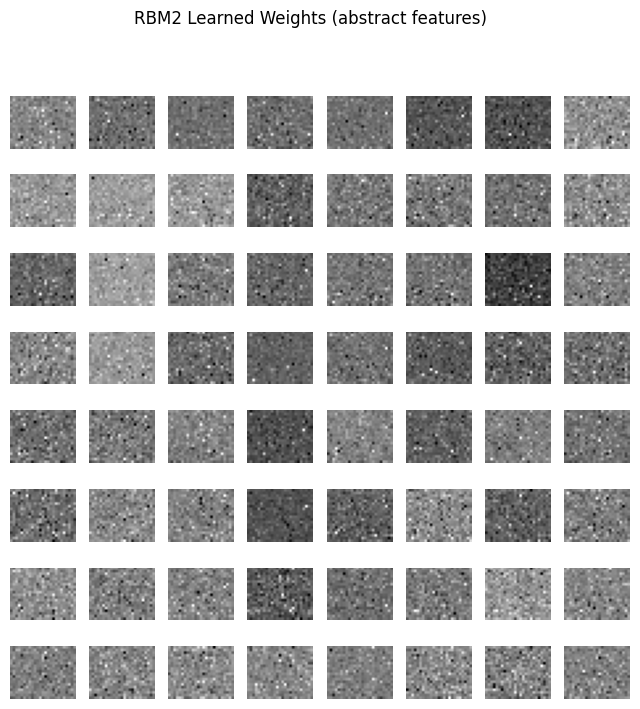

In [12]:
# Visualize RBM2 weights (first 64 hidden units)
fig, axes = plt.subplots(8, 8, figsize=(8,8))
for i, ax in enumerate(axes.flat):
    ax.imshow(rbm2.W[i].detach().view(20,25), cmap="gray")  # reshape approx
    ax.axis("off")
plt.suptitle("RBM2 Learned Weights (abstract features)")
plt.show()

In [13]:
# -----------------------------
# Visualize Reconstructions (Fixed)
# -----------------------------
dataiter = iter(trainloader)
images, _ = next(dataiter)
v0 = images[:8]

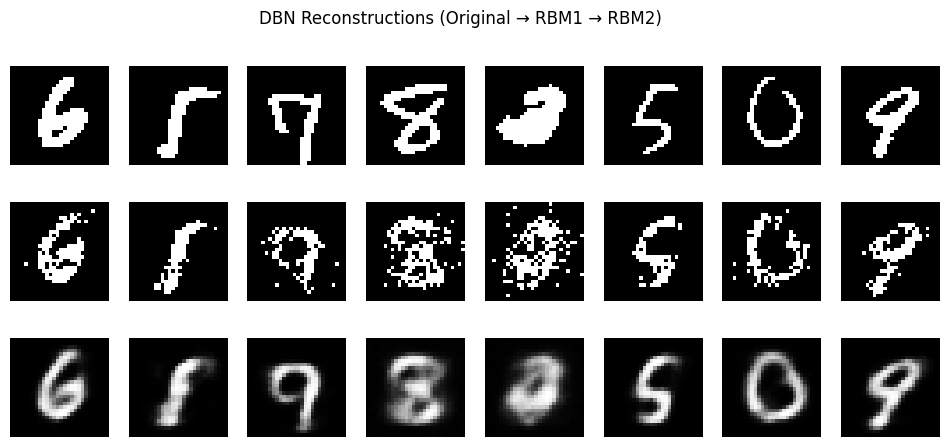

In [14]:
# RBM1 reconstruction
v1_recon = rbm1.forward(v0).detach()

# RBM2 reconstruction pipeline (hidden → visible again)
with torch.no_grad():
    prob_h1, _ = rbm1.sample_h(v0)          # 500-dim hidden from RBM1
    prob_h2, _ = rbm2.sample_h(prob_h1)     # 250-dim hidden from RBM2
    prob_v2, _ = rbm2.sample_v(prob_h2)     # reconstruct to 500-dim
    v2_recon, _ = rbm1.sample_v(prob_v2)    # reconstruct to 784-dim (28x28)

fig, axes = plt.subplots(3, 8, figsize=(12,5))
for i in range(8):
    axes[0,i].imshow(v0[i].view(28,28), cmap="gray"); axes[0,i].axis("off")
    axes[1,i].imshow(v1_recon[i].view(28,28), cmap="gray"); axes[1,i].axis("off")
    axes[2,i].imshow(v2_recon[i].view(28,28), cmap="gray"); axes[2,i].axis("off")
axes[0,0].set_ylabel("Original", fontsize=12)
axes[1,0].set_ylabel("RBM1", fontsize=12)
axes[2,0].set_ylabel("RBM2", fontsize=12)
plt.suptitle("DBN Reconstructions (Original → RBM1 → RBM2)")
plt.show()

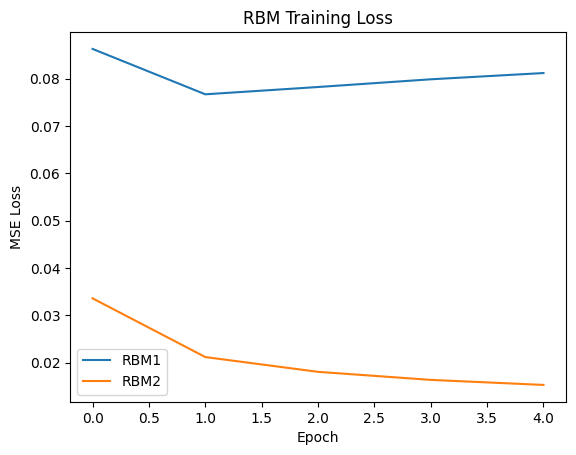

In [15]:
# -----------------------------
# Plot Training Loss Curves
# -----------------------------
plt.plot(losses1, label="RBM1")
plt.plot(losses2, label="RBM2")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("RBM Training Loss")
plt.legend()
plt.show()

In [21]:
# ===========================================================
# DBN Training with Visual Progress
# ===========================================================

def train_rbm_with_visuals(rbm, dataloader, lr=0.01, epochs=5, k=1, name="RBM", sample_images=None):
    losses = []
    snapshots = []
    for epoch in range(epochs):
        epoch_loss = 0
        for batch in dataloader:
            if isinstance(batch, (list, tuple)):
                v0 = batch[0]
            else:
                v0 = batch
            dW, dvb, dhb = rbm.contrastive_divergence(v0, k=k)
            rbm.W.data += lr * dW / v0.size(0)
            rbm.v_bias.data += lr * dvb / v0.size(0)
            rbm.h_bias.data += lr * dhb / v0.size(0)
            v_recon = rbm.forward(v0)
            loss = torch.mean((v0 - v_recon) ** 2).item()
            epoch_loss += loss

        losses.append(epoch_loss/len(dataloader))
        print(f"{name} Epoch {epoch+1}, Loss: {losses[-1]:.4f}")

        # Save reconstruction snapshots
        if sample_images is not None:
            with torch.no_grad():
                recon = rbm.forward(sample_images).detach()
            snapshots.append((epoch+1, recon))
    return losses, snapshots

In [22]:
# -----------------------------
# Sample images for visual tracking
# -----------------------------
dataiter = iter(trainloader)
sample_images, _ = next(dataiter)
sample_images = sample_images[:8]

RBM1 Epoch 1, Loss: 0.0865
RBM1 Epoch 2, Loss: 0.0768
RBM1 Epoch 3, Loss: 0.0778
RBM1 Epoch 4, Loss: 0.0791
RBM1 Epoch 5, Loss: 0.0801


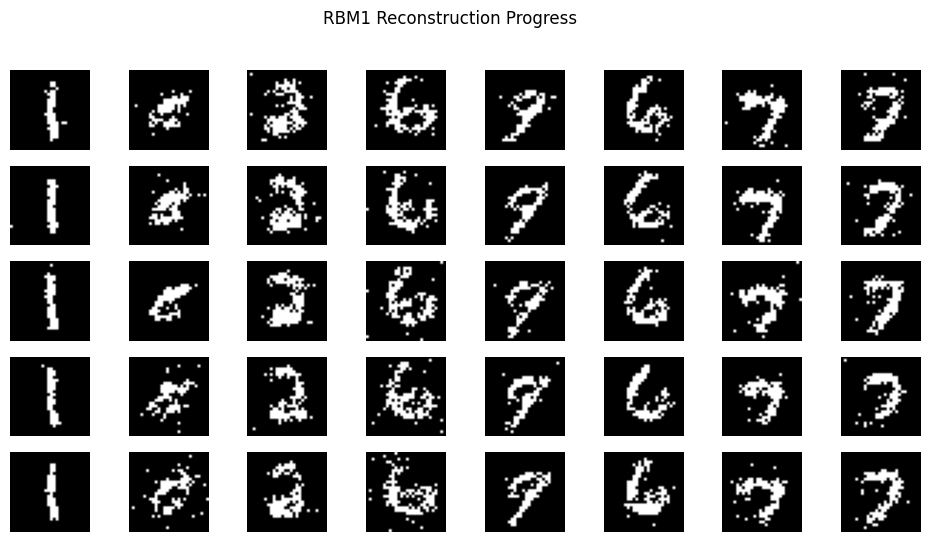

In [23]:
# -----------------------------
# Train RBM1 with snapshots
# -----------------------------
rbm1 = RBM(784, 500)
losses1, snaps1 = train_rbm_with_visuals(rbm1, trainloader, lr=0.05, epochs=5,
                                         name="RBM1", sample_images=sample_images)

# Visualize progression for RBM1
fig, axes = plt.subplots(len(snaps1), 8, figsize=(12,6))
for row, (epoch, recon) in enumerate(snaps1):
    for i in range(8):
        axes[row,i].imshow(recon[i].view(28,28), cmap="gray")
        axes[row,i].axis("off")
    axes[row,0].set_ylabel(f"Ep {epoch}", fontsize=10)
plt.suptitle("RBM1 Reconstruction Progress")
plt.show()

In [24]:
# -----------------------------
# Train RBM2 with snapshots
# -----------------------------
hidden_data = []
with torch.no_grad():
    for batch, _ in trainloader:
        prob_h, h = rbm1.sample_h(batch)
        hidden_data.append(prob_h)
hidden_data = torch.cat(hidden_data, dim=0)
hidden_loader = torch.utils.data.DataLoader(hidden_data, batch_size=64, shuffle=True)

rbm2 = RBM(500, 250)
losses2, snaps2 = train_rbm_with_visuals(rbm2, hidden_loader, lr=0.05, epochs=5,
                                         name="RBM2", sample_images=prob_h[:8])


RBM2 Epoch 1, Loss: 0.0348
RBM2 Epoch 2, Loss: 0.0223
RBM2 Epoch 3, Loss: 0.0190
RBM2 Epoch 4, Loss: 0.0171
RBM2 Epoch 5, Loss: 0.0159


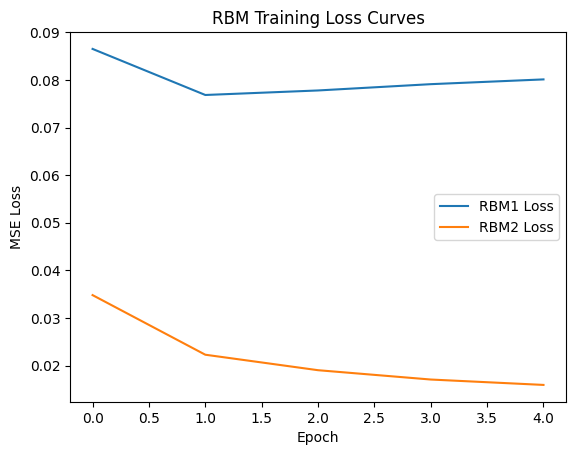

In [25]:
# -----------------------------
# Loss Curves
# -----------------------------
plt.plot(losses1, label="RBM1 Loss")
plt.plot(losses2, label="RBM2 Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("RBM Training Loss Curves")
plt.legend()
plt.show()